In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
from Sector_Exposure import Rate_Exposures
import numpy as np
import matplotlib.pyplot as plt
import Useful_Functions as useful
from statsmodels.tsa.stattools import adfuller

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')

#useful.current_rates("m", descrip=False)

In [88]:


useful.update_data()



In [52]:


current_daily = useful.current_rates("d", False)

current_monthly = useful.current_rates("m", False)

current_daily


(2.0, -1.0)

In [3]:


def update_data(compare_group = None):
    
    assert compare_group
    
    fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')
    
    # "ten", "two",
    sector_names = ['Materials', 'Industrials', 'Consumer Discretionary', 
                        'Consumer Staples', 'Health Care',
                        'Financials', 'Information Technology', 
                        'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', "Aerospace",
                        "SP-500", "Real Yield", "Yield Curve"]
    
    # "ten", "two",
    factor_names = ['Value', 'Quality', 'Size', 'Default', "Real Yield", "Yield Curve"]
    
    if 'sector' in compare_group.lower():
        
        d = "1980-01-04"
        
        sec = yf.download([f"^SP500-{i}" for i in range(15,65,5)], start = d, progress=False)["Close"]
        sec['Energy'] = yf.download(["^GSPE"], start = d, progress=False)["Close"]
        sec['Semiconductors'] = yf.download(["SOXX"], start = d, progress=False)["Close"]
        sec['Aerospace'] = yf.download(["ITA"], start = d, progress=False)["Close"]
        sec['SP-500'] = yf.download("^GSPC", start = d, progress=False)["Close"]
        sec['Real Yield'] = fred.get_series('DFII10', observation_start = d, end = date.today())
        sec['Yield Curve'] = fred.get_series('T10Y2Y', observation_start = d, end = date.today())
        
    if 'factor' in compare_group.lower():
        
        fact = pd.DataFrame()
        fact['Value'] = yf.download(["VLUE"], start = d, progress=False)["Close"]
        fact['Quality'] = yf.download(["QUAL"], start = d, progress=False)["Close"]
        fact['Size'] = yf.download(["SIZE"], start = d, progress=False)["Close"]
        fact['Default'] = yf.download(["FIBR"], start = d, progress=False)["Close"]
        fact['Real Yield'] = sec['Real Yield']
        fact['Yield Curve'] = sec['Yield Curve']
    
    #sec['ten'] = fred.get_series('DGS10', observation_start = d, end = date.today())
    #sec['two'] = fred.get_series('DGS2', observation_start = d, end = date.today())
    
    if 'sector' in compare_group.lower():
        sec.columns = sector_names
        return sec.dropna()
    
    if 'factor' in compare_group.lower():
        sec.columns = factor_names
        return sec.dropna()


#factor_df = update_data('factors')
#sector_df = update_data('sectors')



In [2]:


#sector_df[['Real Yield','Yield Curve']].plot()

#sector_df = pd.read_csv("sectors_and_rates.csv", index_col="Date")
#factor_df = pd.read_csv("factors_and_rates.csv", index_col="Date")

#sector_df
#factor_df

#sector_df = pd.read_csv("2006.csv", index_col="Date")

sector_df = pd.read_csv("sectors_and_rates.csv", index_col="Date")

False

In [29]:

correlations = {}

drops = [col for col in sector_df.columns if col == "SP-500" or col in ['Real Yield', 'Yield Curve']]

consider = sector_df.pct_change()

for num, d in enumerate(sector_df.index):
    
    if num > 0 and (num+500 < len(sector_df)):
        
        # (sector_df[num:num+window].corr()[self.benchmark])
        correlations[d] = sector_df[num:num+30].corr()["SP-500"].drop(columns = drops)
        
        #for sec in sector_df.columns.drop(drops):
            #correlations[d][sec] = useful.beta_asset_to_index(consider[[sec, "SP-500"]][num:num+500].values)



In [30]:


pd.DataFrame(correlations).T


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace,SP-500,Real Yield,Yield Curve
2006-05-08,0.980573,0.974273,0.987279,0.788572,0.687210,0.966227,0.969211,0.283833,-0.108084,0.213206,0.979343,0.962465,0.966206,1.0,-0.354280,0.761119
2006-05-09,0.980236,0.971858,0.987366,0.728490,0.673136,0.962667,0.965302,0.142566,-0.175409,0.131804,0.977613,0.958757,0.963508,1.0,-0.423961,0.769639
2006-05-10,0.976920,0.967370,0.985096,0.633457,0.685627,0.954066,0.956028,-0.006476,-0.205021,0.025895,0.972496,0.949542,0.958856,1.0,-0.420841,0.763604
2006-05-11,0.970919,0.960663,0.981347,0.521022,0.721375,0.941724,0.943942,-0.145318,-0.275252,-0.126718,0.965861,0.938118,0.949241,1.0,-0.440275,0.802578
2006-05-12,0.962433,0.952649,0.978046,0.525584,0.769748,0.931962,0.938133,-0.220837,-0.282350,-0.159192,0.955762,0.929286,0.940570,1.0,-0.451381,0.802165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-21,0.944984,0.926235,0.866142,0.880357,0.631597,0.850065,0.654372,0.842910,0.670004,0.914659,0.715483,0.854126,0.859960,1.0,0.089722,0.767235
2020-05-22,0.941558,0.898712,0.836722,0.854218,0.659834,0.783789,0.641303,0.854603,0.582361,0.891278,0.661066,0.841585,0.799151,1.0,0.051941,0.767536
2020-05-26,0.930026,0.860722,0.802580,0.837921,0.683366,0.705249,0.606593,0.869510,0.520398,0.855132,0.609454,0.816054,0.715271,1.0,0.063590,0.739420
2020-05-27,0.925290,0.817271,0.780050,0.826027,0.690244,0.647750,0.584337,0.880748,0.462257,0.805698,0.556851,0.800533,0.625448,1.0,0.070900,0.720006


In [92]:

exposure_report = Rate_Exposures(sector_df, 252, 60, ['Real Yield', 'Yield Curve'], "SP-500")


In [9]:


corr = exposure_report.get_correlation_x_days_after_signal(60)

betas = exposure_report.get_betas_x_days_after_signal(30)


In [13]:



betas.mean()
corr.mean()

Materials  Industrials  Consumer Discretionary  Consumer Staples  \
-6 -5   0.989532     0.995547                1.008118          0.883596   
   -4   0.962996     0.983451                0.996249          0.862267   
   -3   0.803236     0.922395                0.911828          0.831358   
   -2   0.858974     0.946690                0.928765          0.844484   
    2   0.465347     0.672130                0.884620          0.517238   
...          ...          ...                     ...               ...   
 6  1   0.917701     0.952178                0.899677          0.720153   
    2   0.941064     0.949020                0.926189          0.810686   
    3   0.914782     0.892939                0.884917          0.783869   
    4   0.940313     0.963033                0.951990          0.827402   
    5   0.928577     0.974258                0.980228          0.859411   

       Health Care  Financials  Information Technology  \
-6 -5     0.984641    0.933416                1.000709   
   -4     0.968283    0.935475                0.976776   
   -3     0.893095    0.744637                0.864974   
   -2     0.886174    0.750208                0.879552   
    2     0.706836    0.768846                0.816059   
...            ...         ...                     ...   
 6  1     0.878254    0.948722                0.956455   
    2     0.887471    0.914077                0.922453   
    3     0.846996    0.911399                0.827766   
    4     0.908065    0.861130                0.934601   
    5     0.869051    0.880278                0.940342   

       Telecommunication Services  Utilities  Real Estate    Energy  \
-6 -5                    0.854187   0.834785     0.952557  1.002785   
   -4                    0.829673   0.813105     0.978911  0.973121   
   -3                    0.765083   0.706731     0.746127  0.898596   
   -2                    0.882996   0.728895     0.743737  0.916891   
    2                    0.686460   0.190902     0.363267  0.354387   
...                           ...        ...          ...       ...   
 6  1                    0.889307   0.636668     0.812657  0.628327   
    2                    0.858357   0.728108     0.737752  0.810025   
    3                    0.714196   0.641896     0.654855  0.855071   
    4                    0.801497   0.749880     0.673957  0.905106   
    5                    0.716001   0.708982     0.670194  0.822628   

       Semiconductors  Aerospace  
-6 -5        0.934212   0.986607  
   -4        0.925002   0.981798  
   -3        0.579288   0.856686  
   -2        0.615429   0.841687  
    2        0.403427   0.586033  
...               ...        ...  
 6  1        0.857779   0.842374  
    2        0.852548   0.892010  
    3        0.773990   0.856775  
    4        0.849974   0.934805  
    5        0.856559   0.905604  

[142 rows x 13 columns]

In [93]:


exposure_report.scores



{'Real Yield': 2011-01-12   -1.0
 2011-01-13   -1.0
 2011-01-14   -0.0
 2011-01-18   -0.0
 2011-01-19   -0.0
              ... 
 2022-05-26    1.0
 2022-05-27    1.0
 2022-05-31    2.0
 2022-06-01    3.0
 2022-06-02    3.0
 Length: 2718, dtype: float64,
 'Yield Curve': 2011-01-12    1.0
 2011-01-13    1.0
 2011-01-14    1.0
 2011-01-18    2.0
 2011-01-19    1.0
              ... 
 2022-05-26   -0.0
 2022-05-27   -0.0
 2022-05-31    0.0
 2022-06-01   -1.0
 2022-06-02   -1.0
 Length: 2718, dtype: float64}

In [197]:



#exposure_report.mean_returns


factors_and_scores = pd.read_excel("factors_and_scores.xlsx", index_col = "Date").iloc[:,:-2]

factors_and_scores.index = pd.to_datetime(factors_and_scores.index)

ry = exposure_report.scores['Real Yield']
ry.index = pd.to_datetime(ry.index)

yc = exposure_report.scores['Yield Curve']
yc.index = pd.to_datetime(yc.index)

factors_and_scores['Real Yield_scores'] = ry
factors_and_scores['Yield Curve_scores'] = yc

#factors_and_scores.groupby(pd.PeriodIndex(factors_and_scores.index, freq="M"))[[i for i in factors_and_scores.columns]].mean()


factors_and_scores = factors_and_scores.dropna()

total_rets = exposure_report.get_return_data(factors_and_scores)
mean_rets = pd.DataFrame({s : total_rets[s].mean() for s in total_rets})

mean_rets = mean_rets.T


different_types = {"Very Negative" : [-6,-5,-4], "Slightly Negative" : [-3,-2], "Neutral" : [-1, 0, 1], "Slightly Positive" : [2,3], "Very Positive" : [4,5,6]}
rets_based_on_combination_type = {"Very Negative" : {i : pd.DataFrame() for i in different_types}, "Slightly Negative" : {i : pd.DataFrame() for i in different_types}, 
                                  "Neutral" : {i : pd.DataFrame() for i in different_types}, 
                                  "Slightly Positive" : {i : pd.DataFrame() for i in different_types}, "Very Positive" : {i : pd.DataFrame() for i in different_types}}

mean_rets_based_on_combination_type = {"Very Negative" : {i : pd.DataFrame() for i in different_types}, "Slightly Negative" : {i : pd.DataFrame() for i in different_types}, 
                                  "Neutral" : {i : pd.DataFrame() for i in different_types}, 
                                  "Slightly Positive" : {i : pd.DataFrame() for i in different_types}, "Very Positive" : {i : pd.DataFrame() for i in different_types}}

for s1 in range(-6,7):

    for s2 in range(-6,7):
        
        for k2 in different_types:
            
            if s2 in different_types[k2]:
                
                for k1 in different_types:
                    
                    if s1 in different_types[k1]:
                        
                        try:
                            rets_based_on_combination_type[k1][k2] = rets_based_on_combination_type[k1][k2].append(mean_rets.loc[(s1,s2)])
                            mean_rets_based_on_combination_type[k1][k2] = mean_rets_based_on_combination_type[k1][k2].append(mean_rets.loc[(s1,s2)])
                        except:
                            #rets_based_on_combination_type[k1][k2] = None
                            pass


#mean_rets_based_on_combination_type = rets_based_on_combination_type.copy()

#winners_based_on_combination_type = rets_based_on_combination_type.copy()

cols = []

for k1 in rets_based_on_combination_type:
    
    for k2 in rets_based_on_combination_type[k1]:
        
        mean_rets_based_on_combination_type[k1][k2] = mean_rets_based_on_combination_type[k1][k2].mean()
        
        #try:
            #winners_based_on_combination_type[k1][k2] = winners_based_on_combination_type[k1][k2].sort_values(ascending=False).index[0]
        #except:
            #winners_based_on_combination_type[k1][k2] = 'No Data'
        
        cols.append((k1,k2))

In [198]:

frame = pd.DataFrame(columns = pd.MultiIndex.from_tuples(cols))


for col in frame.columns:
    
    frame[col] = mean_rets_based_on_combination_type[col[0]][col[1]]

frame = frame.T
frame = frame.dropna()

#winners_df = pd.DataFrame(winners_based_on_combination_type)

#winners_df
frame

DEFAULT   QUALITY  MOMENTUM  \
Very Negative     Very Negative     -0.150814  0.045532  0.070903   
                  Slightly Negative -0.079499  0.093607  0.030985   
                  Neutral            0.272793 -0.159552 -0.118767   
                  Slightly Positive  0.025329  0.022633 -0.069054   
                  Very Positive      0.612200 -0.460417 -0.216833   
Slightly Negative Very Negative     -0.047678 -0.024097  0.024974   
                  Slightly Negative -0.042559  0.006417  0.037577   
                  Neutral            0.147763 -0.086077 -0.048090   
                  Slightly Positive  0.345586 -0.228911 -0.156566   
                  Very Positive      0.672560 -0.517500 -0.268460   
Neutral           Very Negative      0.053841 -0.007511 -0.004736   
                  Slightly Negative -0.031718  0.049640  0.031735   
                  Neutral           -0.019131  0.037084  0.029224   
                  Slightly Positive  0.113641 -0.026901 -0.030133   
                  Very Positive      0.289638 -0.147095 -0.120265   
Slightly Positive Very Negative     -0.235800  0.177000  0.178400   
                  Slightly Negative -0.116922  0.122816  0.054998   
                  Neutral           -0.017006  0.097696  0.006194   
                  Slightly Positive  0.011647  0.048887  0.029412   
                  Very Positive     -0.026380  0.092300  0.028700   
Very Positive     Neutral           -0.110479  0.134878  0.029503   
                  Slightly Positive  0.037272  0.020272  0.023811   
                  Very Positive      0.102683 -0.045190  0.009824   

                                     BOOK_TO_PRICE      SIZE  CASH_TO_ASSETS  
Very Negative     Very Negative           0.041792  0.010606        0.041081  
                  Slightly Negative       0.002113  0.042093        0.134308  
                  Neutral                 0.021803  0.224029        0.182769  
                  Slightly Positive      -0.173579  0.066358        0.239254  
                  Very Positive           0.176533  0.559167        0.419100  
Slightly Negative Very Negative           0.008802  0.051702        0.102240  
                  Slightly Negative       0.016706  0.023321        0.104324  
                  Neutral                 0.091708  0.150729        0.097421  
                  Slightly Positive       0.150525  0.306259        0.167168  
                  Very Positive           0.292960  0.574220        0.257800  
Neutral           Very Negative           0.013903  0.004981        0.048024  
                  Slightly Negative      -0.003011 -0.019132        0.056438  
                  Neutral                 0.026372  0.016762        0.084997  
                  Slightly Positive       0.143681  0.105862        0.069083  
                  Very Positive           0.350843  0.147578       -0.136561  
Slightly Positive Very Negative          -0.037200 -0.025000        0.061200  
                  Slightly Negative      -0.070425 -0.069188        0.058258  
                  Neutral                -0.003309 -0.036662        0.018008  
                  Slightly Positive       0.026688 -0.008053        0.094706  
                  Very Positive           0.143460 -0.072280       -0.003440  
Very Positive     Neutral                -0.104337 -0.109541        0.067688  
                  Slightly Positive       0.037520  0.033350        0.105270  
                  Very Positive           0.049638  0.060139        0.115590

In [218]:


total_rets[(5, 1)]



,DEFAULT,QUALITY,MOMENTUM,BOOK_TO_PRICE,SIZE,CASH_TO_ASSETS
Date,,,,,,
2013-06-04,0.0475,0.0081,0.0349,0.0579,0.0176,0.0971
2018-04-25,-0.0530,0.1326,-0.0156,-0.1556,-0.1025,0.1398
2018-05-17,-0.1569,0.1673,-0.0002,-0.1430,-0.1182,0.0701
2018-10-05,-0.2601,0.2461,0.0697,-0.1420,-0.2063,-0.0053


In [219]:


rets_based_on_combination_type['Very Positive']['Neutral']

mean_rets_based_on_combination_type['Very Positive']['Neutral']


DEFAULT          -0.110479
QUALITY           0.134878
MOMENTUM          0.029503
BOOK_TO_PRICE    -0.104337
SIZE             -0.109541
CASH_TO_ASSETS    0.067688
dtype: float64

<AxesSubplot:>

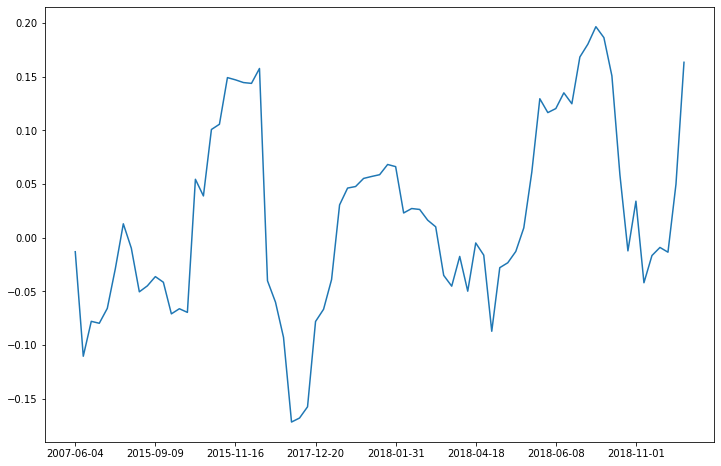

In [69]:


exposure_report.mean_returns.loc[current_daily].sort_values()


exposure_report.total_returns[current_daily]['Utilities'].plot(figsize = (12,8))

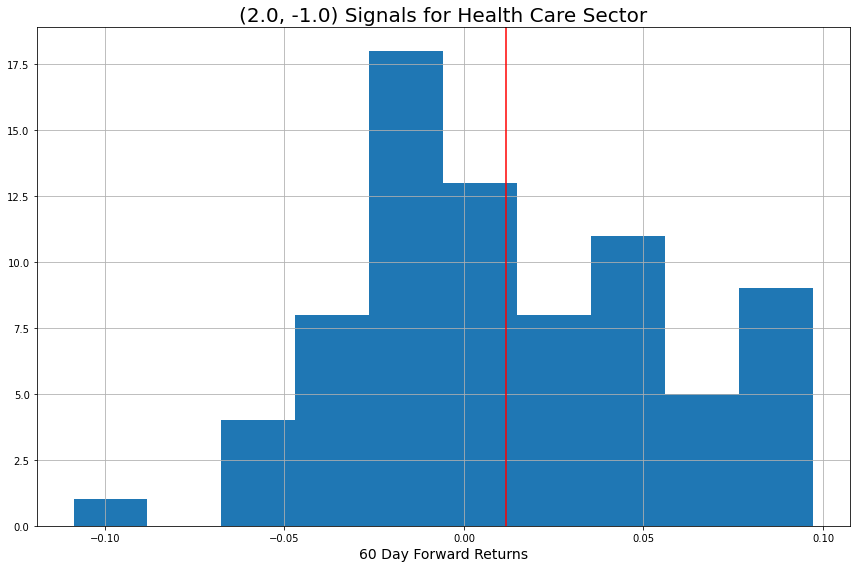

In [65]:



exposure_report.show_return_distribution(0, "Health Care", current_daily)




In [15]:



useful.beta_asset_to_index(sector_df[['Materials', "SP-500"]].pct_change().dropna()[:20].values)




0.7686928983803405

In [42]:

bruh = sector_df[['Materials', "SP-500"]]

mat_vs_sp500 = bruh.values

#np.cov(mat_vs_sp500).shape

ok = np.vstack((mat_vs_sp500[:,0], mat_vs_sp500[:,1]))

#mat_vs_sp500.shape


def beta_asset_to_index(asset_to_index):
    
    asset_to_index = np.vstack((asset_to_index[:,0], asset_to_index[:,1]))
    
    #log_returns = np.log(asset_to_index/asset_to_index.shift()).values
    
    return np.cov(asset_to_index)[0][1] / np.var(asset_to_index)


beta_asset_to_index(bruh)

#useful.beta(bruh)


nan

In [34]:

bruh.cov()



,Materials,SP-500
Materials,8942.002412,89914.310948
SP-500,89914.310948,942358.638962


<BarContainer object of 4 artists>

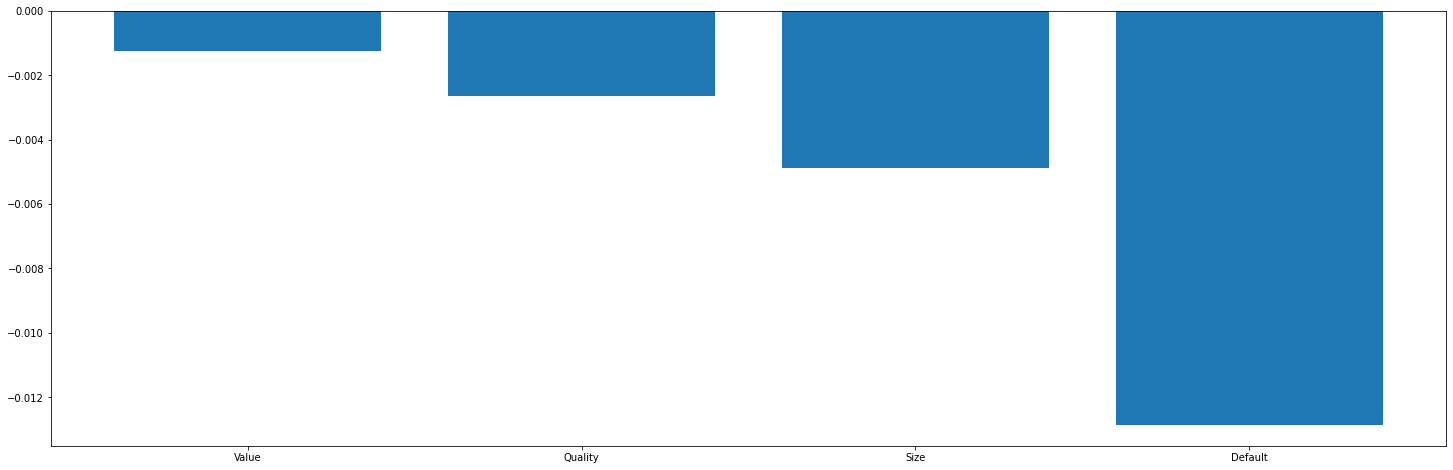

In [7]:


#plt.scatter(exposure_report.mean_returns.Materials.index, exposure_report.mean_returns.Materials)

plt.figure(figsize = (25, 8))
plt.bar(exposure_report.mean_returns_monthly.loc[(4.0, 0.0)].index, exposure_report.mean_returns_monthly.loc[(4.0, 0.0)])



In [9]:


exposure_report.signal_dates_and_returns(True, "Default", (2,-2))



2018-03   -0.007347
2018-05    0.004352
Freq: M, Name: Default, dtype: float64

<AxesSubplot:>

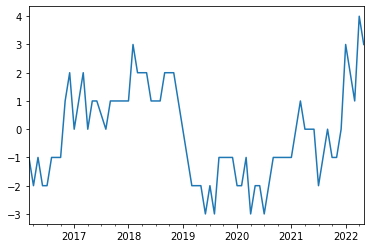

In [24]:


ok = exposure_report.scores['Real Yield'].copy()


round(ok.groupby(pd.PeriodIndex(ok.index, freq="M")).mean(), 0).plot()

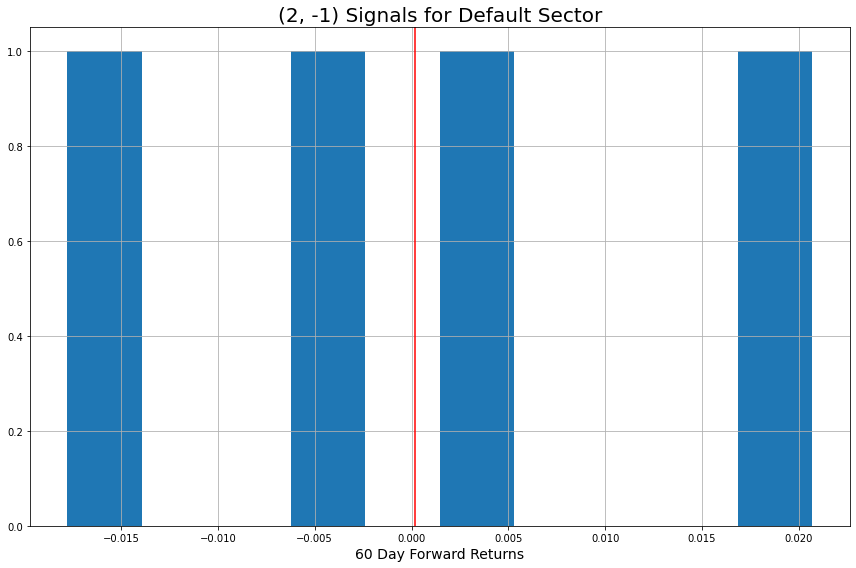

In [17]:


# (4,3)
# 'Information Technology'
exposure_report.show_return_distribution(True, 'Default', (2, -1))

#real_rate.total_returns



In [35]:

both = pd.Series([(r,c) for r,c in zip(exposure_report.scores['Real Yield'].dropna(), exposure_report.scores['Yield Curve'].dropna())], 
                 index = exposure_report.scores['Yield Curve'].dropna().index)

### Combined real rate and yield curve signals ### 
counts = both.value_counts()

### Top 20 combined real rate and yield curve signals ### 
counts[:20]

(-2.0, -1.0)    70
(-1.0, -1.0)    59
(1.0, -2.0)     58
(-1.0, 1.0)     57
(0.0, -2.0)     55
(-1.0, -0.0)    53
(-2.0, -0.0)    44
(3.0, -1.0)     41
(0.0, 2.0)      40
(-1.0, 2.0)     39
(2.0, -1.0)     38
(-0.0, -1.0)    37
(1.0, -1.0)     35
(0.0, 1.0)      35
(-1.0, 3.0)     31
(-0.0, -0.0)    28
(-2.0, 1.0)     28
(-1.0, -2.0)    28
(-3.0, -1.0)    27
(-2.0, 2.0)     27
dtype: int64

In [24]:



exposure_report.total_returns[(2,-2)].Semiconductors.sort_values()


2018-03-09   -0.083471
2018-03-16   -0.076266
2018-03-07   -0.071016
2018-03-19   -0.069862
2018-03-26   -0.045560
2018-03-23   -0.037838
2018-03-06   -0.031694
2017-10-20   -0.025182
2018-03-02   -0.019335
2018-03-05   -0.009328
2017-11-30   -0.007982
2018-02-28    0.000462
2017-10-18    0.004565
2018-10-30    0.026035
2018-10-31    0.029109
2021-06-21    0.030967
2017-05-23    0.045887
Name: Semiconductors, dtype: float64

In [30]:

# Factor Tickers:

# ^SPXQUP


# Value: VLUE
# Quality: QUAL
# Momentum: MTUM
# Size: SIZE
# Default: FIBR




HTTPError: HTTP Error 403: Forbidden

In [16]:


def beta(data_2_columns):
    
    log_returns = np.log(data_2_columns/data_2_columns.shift())
    
    return (log_returns.cov() / log_returns.var())[log_returns.columns[0]].iloc[1]
    
    



In [17]:



beta(real_rate_df[['Materials', 'SP-500']])




0.7246502122767499

In [8]:

mat = c.get_sector_forward_return(c.scores, "Materials")

AttributeError: 'CompareSectors' object has no attribute 'get_sector_forward_return'

In [21]:


yuh['Materials'] == mat['30-Day Forward Return']




2012-01-09    True
2012-01-10    True
2012-01-11    True
2012-01-12    True
2012-01-13    True
              ... 
2022-04-07    True
2022-04-08    True
2022-04-11    True
2022-04-12    True
2022-04-13    True
Length: 2437, dtype: bool

In [7]:

# .drop(columns = ['SP-500'])
c = CompareSectors(cool, 252*2, 30)

rets = c.get_return_means()




['Materials', 'Industrials', 'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology', 'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', 'Aerospace']
Materials
Industrials
Consumer Discretionary
Consumer Staples
Health Care
Financials
Information Technology
Telecommunication Services
Utilities
Real Estate
Energy
Semiconductors
Aerospace


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,0.000617,-0.030278,0.037210,-0.030313,0.001725,-0.037020,0.027196,0.017230,-0.036913,-0.049653,-0.011154,0.034408,-0.049139
-4,0.015785,0.004656,0.004084,0.000982,-0.001610,-0.001997,0.009602,-0.008703,-0.016870,-0.015350,-0.051065,0.027530,-0.017540
-3,-0.002614,-0.004092,0.008682,-0.002052,-0.004110,-0.005038,0.016778,0.000358,-0.023473,-0.022742,-0.050373,0.016872,-0.022844
-2,0.000078,-0.005131,0.003580,-0.007578,-0.001113,0.004697,0.008820,-0.002957,-0.007394,-0.004183,-0.027857,0.022025,-0.008390
-1,-0.001979,0.001682,-0.001101,-0.010535,-0.004486,0.014369,0.007386,-0.007523,-0.018441,-0.009586,0.010230,0.020499,0.007172
0,-0.005030,-0.002615,0.004167,-0.003534,0.005477,0.002719,0.007727,-0.012287,-0.010024,-0.008719,-0.005225,0.009708,0.005941
1,-0.006908,0.000436,0.006225,-0.000484,0.004490,-0.007563,0.005541,-0.005057,0.003821,-0.000555,-0.005824,0.000128,0.006095
2,-0.006246,-0.000188,0.000731,0.000422,0.005234,-0.012030,0.008704,-0.011417,0.017655,0.010462,-0.006029,0.003556,0.008820
3,-0.005670,-0.007613,-0.000279,0.010308,0.011246,-0.009736,0.002744,-0.006375,0.027451,0.020651,-0.015335,0.008562,0.002098
4,0.005307,0.004287,-0.004293,0.014081,0.015563,-0.006457,-0.009928,-0.026052,0.023247,0.006317,0.023326,0.004056,0.016567


In [51]:


#c.get_sector_forward_return(c.scores, "Materials")['30-Day Forward Return'].plot()


#(-1*(cool['Materials'].diff(-30)/cool['Materials'])).plot()

(cool.iloc[60] / cool.iloc[30]) - 1

Materials                     0.066729
Industrials                   0.102437
Consumer Discretionary        0.096237
Consumer Staples              0.036774
Health Care                   0.023846
Financials                    0.116396
Information Technology        0.066650
Telecommunication Services    0.037410
Utilities                     0.019621
Real Estate                   0.133663
Energy                        0.014165
Semiconductors                0.055306
Aerospace                     0.113164
Real Yield                    0.095890
SP-500                        0.063592
dtype: float64

<BarContainer object of 9 artists>

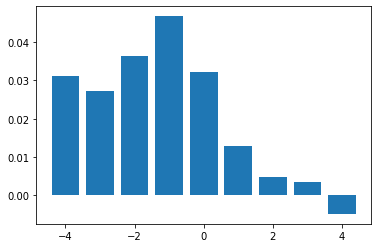

In [65]:
import matplotlib.pyplot as plt

#rets.mean(axis=1)


plt.bar(rets.index, rets['Semiconductors'])



<BarContainer object of 9 artists>

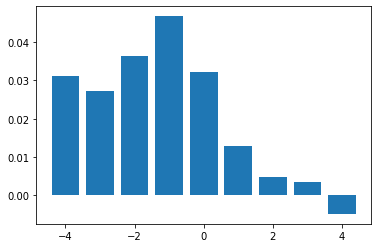

In [77]:


plt.bar(rets.index, rets['Semiconductors'])



In [70]:

semi = c.get_sector_forward_return(c.scores, "Semiconductors")



0.07894736842105263

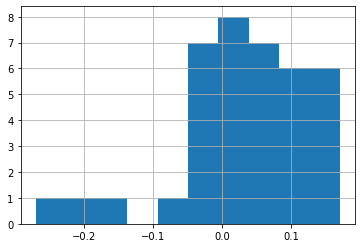

In [80]:



semi['30-Day Forward Return'].loc[semi.Scores == -4].hist()


len(semi['30-Day Forward Return'].loc[semi.Scores == -4])

